# Data Analysis Concept

Prototype implementation of the concepts of automated data analysis, which was developed as part of the Master's Thesis 
<br/>
<b>"Design and Implementation of a Recommendation System for the Selection and Application of XAI Methods"</b>


For further information, please contact <a href="mailto:verena.barth@viadee.de">Verena Barth</a> or read her thesis :) 


## Correlation

In [1]:
# imports

import numpy as np
import skfuzzy as fuzz
from alibi.datasets import fetch_adult
import pandas as pd

import helper as h
import analyzer as a
from helper import rating_5, rating_3 

In [2]:
# Global PhiK Correlations of Adult Dataset

global_corrs = {'Sex': 0.9735531553157801,
 'Relationship': 0.9616894295650217,
 'Occupation': 0.9203637025447863,
 'Age': 0.8786525448525523,
 'Marital Status': 0.8526429075806027,
 'Education Num': 0.7561096648877135,
 'Workclass': 0.6902495682931808,
 'Hours_Week_bin': 0.6392462879230398,
 'Race': 0.3582696897293252,
 'Capital Gain': 0.23200659364993087,
 'fnlgwt': 0.22273605997192936,
 'Capital Loss': 0.14499350115931225}

# make to percent
gc_percent = global_corrs.copy()
gc_percent.update((x, y*100) for x, y in global_corrs.items())

Membership functions of Correlation (of FOI)


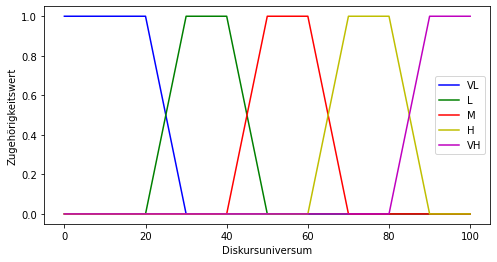

In [3]:
# universe
x_corr = np.arange(0, 101, 1)

corr_mf = []

# create membership functions
[corr_mf.append(fuzz.trapmf(x_corr, r)) for m, r in zip(rating_5,[np.array(m) * 100 for m in h.mems_corr_unscaled])]

print("Membership functions of Correlation (of FOI)")
h.plot_memberships(x_corr, corr_mf,mem_names=rating_5)

In [4]:
# memberships of all global correlation values

print("Membership values per feature:")
corr_mems = h.get_mems(corr_mf,x_corr, gc_percent)
corr_mems

Membership values per feature:


{'Sex': [0.0, 0.0, 0.0, 0.0, 1.0],
 'Relationship': [0.0, 0.0, 0.0, 0.0, 1.0],
 'Occupation': [0.0, 0.0, 0.0, 0.0, 1.0],
 'Age': [0.0, 0.0, 0.0, 0.21347455147447647, 0.7865254485255235],
 'Marital Status': [0.0, 0.0, 0.0, 0.47357092419397306, 0.5264290758060269],
 'Education Num': [0.0, 0.0, 0.0, 1.0, 0.0],
 'Workclass': [0.0, 0.0, 0.09750431706819143, 0.9024956829318086, 0.0],
 'Hours_Week_bin': [0.0, 0.0, 0.6075371207696015, 0.39246287923039846, 0.0],
 'Race': [0.0, 1.0, 0.0, 0.0, 0.0],
 'Capital Gain': [0.6799340635006913, 0.32006593649930865, 0.0, 0.0, 0.0],
 'fnlgwt': [0.7726394002807065, 0.22736059971929343, 0.0, 0.0, 0.0],
 'Capital Loss': [1.0, 0.0, 0.0, 0.0, 0.0]}

In [5]:
def test(vals, verbose=False):
    return a.get_global_corr(list(vals.values()), corr_mf, x_corr, verbose)

Global correlation of UCI Adults Dataset
----------------------------------------------------------------------------------------------------
Global Correlation values:
[0.974, 0.962, 0.92, 0.879, 0.853, 0.756, 0.69, 0.639, 0.358, 0.232, 0.223, 0.145]
Number of features per membership: 
    {'VL': 3, 'L': 3, 'M': 2, 'H': 5, 'VH': 5}
Exact number of features per membership: 
    {'VL': 2.453, 'L': 1.547, 'M': 0.705, 'H': 2.982, 'VH': 4.313}
Mean:  0.636
MAD:  0.264
--- Mean + MAD: 
    Value to fuzzify: 0.9,  membership values: ['VH']
----------------------------------------------------------------------------------------------------
--- Mean + MAD/2: 
    Value to fuzzify: 0.768,  membership values: ['H']


(0.768, {'VL': 0.0, 'L': 0.0, 'M': 0.0, 'H': 1.0, 'VH': 0.0})

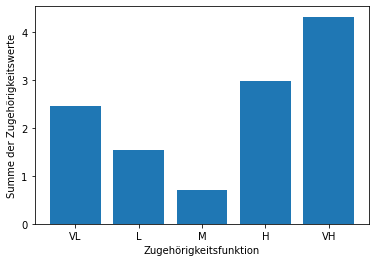

In [6]:
# get_dataset_statistic(list(global_corrs.values()))#), save="adult_corr_test")
print("Global correlation of UCI Adults Dataset")
test(global_corrs, True)

### Some examples to test

In [7]:
# some example data

global_corrs2 = {'Sex': 0.1,
 'Relationship': 0.1,
 'Occupation': 0.1,
 'Age': 0.1,
 'Marital Status': 0.1,
 'Education Num': 0.1,
 'Workclass': 0.1,
 'Hours_Week_bin': 0.1,
 'Race': 0.1,
 'Capital Gain': 0.1,
 'fnlgwt': 0.5,
 'Capital Loss': 0.9}

# L: 3, M: 6, H: 3
global_corrs3 = {'Sex': 0.6,
 'Relationship': 0.6,
 'Occupation': 0.5,
 'Age': 0.5,
 'Marital Status': 0.7,
 'Education Num': 0.1,
 'Workclass': 0.1,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain': 0.1,
 'fnlgwt': 0.5,
 'Capital Loss': 0.9}

# L: 5, M: 5, H: 2
global_corrs4 = {'Sex': 0.1,
 'Relationship': 0.6,
 'Occupation': 0.5,
 'Age': 0.5,
 'Marital Status': 0.7,
 'Education Num': 0.1,
 'Workclass': 0.1,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain': 0.1,
 'fnlgwt': 0.5,
 'Capital Loss': 0.1}

# L: 6, M: 3, H: 2
global_corrs4 = {'Sex': 0.1,
 'Relationship': 0.6,
 'Occupation': 0.5,
 'Age': 0.5,
 'Marital Status': 0.7,
 'Education Num': 0.1,
 'Workclass': 0.1,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain': 0.1,
 'fnlgwt': 0.1,
 'Capital Loss': 0.1}

# L: 2, M: 3, H: 6
global_corrs5 = {'Sex': 0.1,
 'Relationship': 0.4,
 'Occupation': 0.4,
 'Age': 0.5,
 'Marital Status': 0.7,
 'Education Num': 0.8,
 'Workclass': 0.1,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain': 0.8,
 'fnlgwt': 0.8,
 'Capital Loss': 0.8}


# L: 6, M: 4, H: 2
global_corrs6 = {'Sex': 0.2,
 'Relationship': 0.2,
 'Occupation': 0.1,
 'Age': 0.5,
 'Marital Status': 0.6,
 'Education Num': 0.6,
 'Workclass': 0.4,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain': 0.2,
 'fnlgwt': 0.2,
 'Capital Loss': 0.2}

# L: 8, M: 0, H: 4
global_corrs7 = {'Sex': 0.2,
 'Relationship': 0.2,
 'Occupation': 0.1,
 'Age': 0.29,
 'Marital Status': 0.1,
 'Education Num': 0.25,
 'Workclass': 0.1,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain': 0.8,
 'fnlgwt': 0.8,
 'Capital Loss': 0.2}

# L: 4, M: 8, H: 0
global_corrs8 = {'Sex': 0.7,
 'Relationship': 0.2,
 'Occupation': 0.1,
 'Age': 0.29,
 'Marital Status': 0.1,
 'Education Num': 0.7,
 'Workclass': 0.7,
 'Hours_Week_bin': 0.6,
 'Race': 0.4,
 'Capital Gain':0.7,
 'fnlgwt': 0.5,
 'Capital Loss': 0.4}

global_corrs9 = {'Sex': 0.1,
 'Relationship': 0.1,
 'Occupation': 0.1,
 'Age': 0.1,
 'Marital Status': 0.1,
 'Education Num': 0.0,
 'Workclass': 0.9,
 'Hours_Week_bin': 0.9,
 'Race': 0.9,
 'Capital Gain':0.85,
 'fnlgwt': 0.8,
 'Capital Loss': 0.8}


# Test titanic correlations

titanic_corrs = {'Pclass': 0.7857806620833868,
 'Sex': 0.3831191056409875,
 'Age': 0.5647742777464296,
 'Fare': 0.7061043091114936,
 'Embarked': 0.6065044475494398,
 'Has_Cabin': 0.6978102719666119,
 'Relatives': 0.6332727171107215}

----------------------------------------------------------------------------------------------------
Global Correlation values:
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.9]
Number of features per membership: 
    {'VL': 10, 'L': 0, 'M': 1, 'H': 0, 'VH': 1}
Exact number of features per membership: 
    {'VL': 10.0, 'L': 0, 'M': 1.0, 'H': 0, 'VH': 1.0}
Mean:  0.2
MAD:  0.167
--- Mean + MAD: 
    Value to fuzzify: 0.367,  membership values: ['L']
----------------------------------------------------------------------------------------------------
--- Mean + MAD/2: 
    Value to fuzzify: 0.283,  membership values: ['VL', 'L']
----------------------------------------------------------------------------------------------------
Global Correlation values:
[0.6, 0.6, 0.5, 0.5, 0.7, 0.1, 0.1, 0.9, 0.9, 0.1, 0.5, 0.9]
Number of features per membership: 
    {'VL': 3, 'L': 0, 'M': 5, 'H': 1, 'VH': 3}
Exact number of features per membership: 
    {'VL': 3.0, 'L': 0, 'M': 5.0, 'H': 1.

(0.671, {'VL': 0.0, 'L': 0.0, 'M': 0.29, 'H': 0.71, 'VH': 0.0})

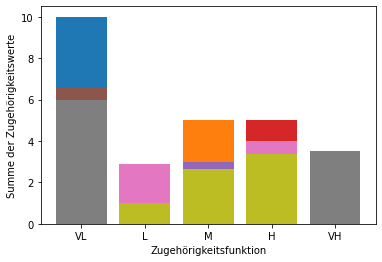

In [8]:
test(global_corrs2, True)
test(global_corrs3, True)
test(global_corrs4, True)
test(global_corrs5, True)
test(global_corrs6, True)
test(global_corrs7, True)
test(global_corrs8, True)
test(global_corrs9, True)

test(titanic_corrs, True)

# Discretizability


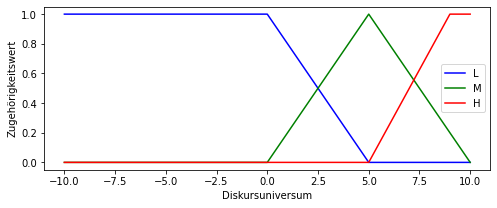

In [9]:
# It's getting fuzzy
# Create Discretization membership function

u_discr = np.arange(-10,11,1)
m_discr = [[-10,-10, 0, 5], [0, 5, 10], [5, 9, 10, 10]]

mems_discr = [fuzz.trimf(u_discr,r) if len(r) == 3 else fuzz.trapmf(u_discr,r) for r in m_discr ]
h.plot_memberships(u_discr,mems_discr,figsize=(8,3))

### Example using modified UCI Adult Dataset

In [10]:
adult = fetch_adult()
data = adult.data
target = adult.target
feature_names = adult.feature_names
category_map = adult.category_map

feature_names

['Age',
 'Workclass',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [11]:
# modifiy dataset to check Discretizability measurement

# add second "Age altered" feature to dataset, same as "Age"
data_new = np.append(data,data[:,0].reshape(len(data[:,0]),1),axis=1)
feature_names_new = feature_names.copy()
feature_names_new.append("Age altered")

# add second "Gain" feature to dataset
gain = pd.Series([x[8] for x in data])
gain_test = gain.copy()

to_alter = 4000
step = 10000

altered = 0

for i,v in enumerate(gain_test):
    if altered < to_alter:
        if altered % 500 == 0:
            step += 20000
        if v ==0:
            gain_test.update({i: step+i})
            altered += 1
    else:
        break
        
data_new = np.append(data_new,gain_test.values.reshape((len(data[:,0]),1)),axis=1)
feature_names_new.append("Gain altered")

# modifiy dataset to check Discretizability measurement

# add super high age
data_new = np.append(data_new, [[40,  4,  4,  2,  1,  4,  4,  0,  1500,  0, 44,  9, 130, 80000]], axis=0)
target = np.append(target, [0], axis=0)
data_new[-1]


print(f"Old data shape: {data.shape}, modified data shape: {data_new.shape}")


Old data shape: (32561, 12), modified data shape: (32562, 14)


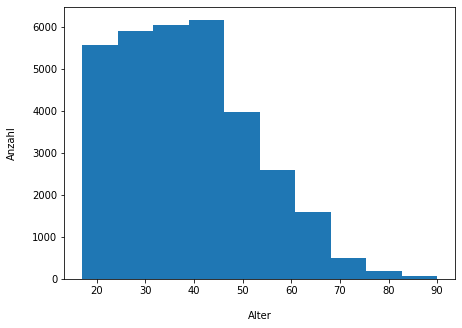

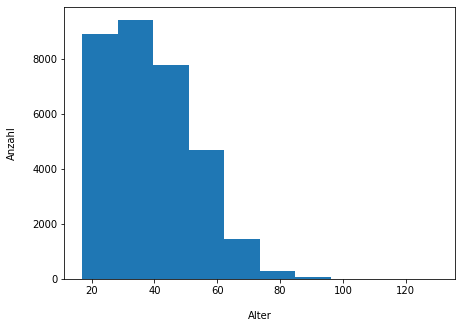

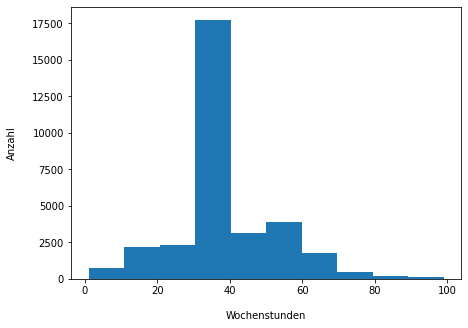

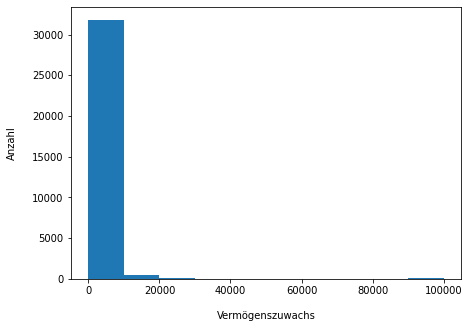

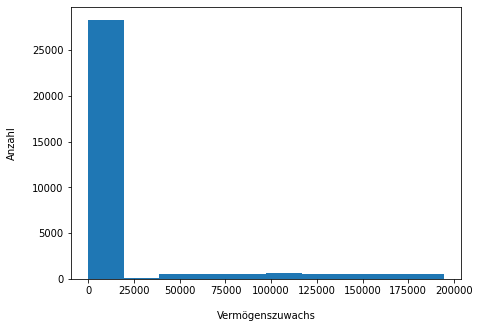

In [12]:
# Plot specific features


# Plot "Age"
age = pd.Series([x[0] for x in data])
h.plot_distribution(age, "Age", "Alter", figsize=(7,5))

# Plot "Age Altered"
h.plot_distribution(pd.Series([x[-2] for x in data_new]), "Age Altered", "Alter", figsize=(7,5))

h.plot_distribution(pd.Series([x[10] for x in data_new]), "Hours per Week", "Wochenstunden", figsize=(7,5))
# Plot "capital gain"
h.plot_distribution(gain, "Capital Gain", "Vermögenszuwachs", figsize=(7,5))
h.plot_distribution(pd.Series([x[-1] for x in data_new]), "Capital Gain Altered", "Vermögenszuwachs", figsize=(7,5))

In [13]:
### Manual test

mads, _ = a.get_discr_stats(data_new, feature_names_new,verbose=False)

# MAD per feature (difference to optimal width of 0.1)
print(f"MAD per feature \n  {mads}")
discrs = [0.1-m for m in mads]
print(f"Discretizability per feature \n  {[np.around(d,3) for d in discrs]}")

mean = np.mean(discrs)
mad = h.calc_mad(discrs)
print("Mean: ", np.around(mean,3))
print("MAD: ",np.around(mad,3))

# scale: 0.1 - mad (optimal bin width - deviation)
discr = [(10-m*100) for m in mads]
discr_mem_vals = [h.get_all_membership_values(u_discr,mems_discr,d) for d in discr]

print("-"*50)

for f,d,mems in zip(feature_names_new,discr,discr_mem_vals):
    print(f"Feature {f}: \n  Discretizability: {np.around(d,3)} \n  Fuzzy Discretizability: {mems}")

MAD per feature 
  [0.07, 0.12, 0.12, 0.14, 0.06, 0.12, 0.16, 0.18, 0.18, 0.18, 0.099, 0.14, 0.107, 0.158]
Discretizability per feature 
  [0.03, -0.02, -0.02, -0.04, 0.04, -0.02, -0.06, -0.08, -0.08, -0.08, 0.001, -0.04, -0.007, -0.058]
Mean:  -0.031
MAD:  0.032
--------------------------------------------------
Feature Age: 
  Discretizability: 3.0 
  Fuzzy Discretizability: {'L': 0.4, 'M': 0.6, 'H': 0.0}
Feature Workclass: 
  Discretizability: -2.0 
  Fuzzy Discretizability: {'L': 1.0, 'M': 0.0, 'H': 0.0}
Feature Education: 
  Discretizability: -2.0 
  Fuzzy Discretizability: {'L': 1.0, 'M': 0.0, 'H': 0.0}
Feature Marital Status: 
  Discretizability: -4.0 
  Fuzzy Discretizability: {'L': 1.0, 'M': 0.0, 'H': 0.0}
Feature Occupation: 
  Discretizability: 4.0 
  Fuzzy Discretizability: {'L': 0.2, 'M': 0.8, 'H': 0.0}
Feature Relationship: 
  Discretizability: -2.0 
  Fuzzy Discretizability: {'L': 1.0, 'M': 0.0, 'H': 0.0}
Feature Race: 
  Discretizability: -6.0 
  Fuzzy Discretizability:

In [14]:
a.get_discr_stats(data_new, feature_names_new,verbose=True)

Age
  bin edges: 
   [17. 22. 26. 30. 33. 37. 41. 45. 50. 58. 90.]
  Bin widths:
   [5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 5.0, 8.0, 32.0]
--------------------
  Mean Widths:  7.3
  MAD Widths:  5.08
--------------------
  Bin width props:
   [0.068, 0.055, 0.055, 0.041, 0.055, 0.055, 0.055, 0.068, 0.11, 0.438]
  Mean Width Proportions:  0.1
  MAD Width Proportions:  0.0696
Workclass
  bin edges: 
   [0. 2. 4. 4. 4. 4. 4. 4. 4. 6. 8.]
  Bin widths:
   [2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0]
--------------------
  Mean Widths:  0.8
  MAD Widths:  0.96
--------------------
  Bin width props:
   [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25]
  Mean Width Proportions:  0.1
  MAD Width Proportions:  0.12
Education
  bin edges: 
   [0. 1. 1. 3. 4. 4. 4. 4. 4. 4. 6.]
  Bin widths:
   [1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
--------------------
  Mean Widths:  0.6
  MAD Widths:  0.72
--------------------
  Bin width props:
   [0.167, 0.0, 0.333, 0.167, 0.0, 0.0, 0.0,

([0.07,
  0.12,
  0.12,
  0.14,
  0.06,
  0.12,
  0.16,
  0.18,
  0.18,
  0.18,
  0.099,
  0.14,
  0.107,
  0.158],
 <alibi.utils.discretizer.Discretizer at 0x22fb1358fa0>)

In [15]:
def get_global_discr(data, feature_names):
    return a.get_global_discr(data, feature_names, u_discr, mems_discr)

In [16]:
orig = get_global_discr(data,feature_names)
modified = get_global_discr(data_new,feature_names_new)

print(f"Discretizability of original UCI Adult Dataset: {orig[1]}")
print(f"Discretizability of modified UCI Adult Dataset: {modified[1]}")

Discretizability of original UCI Adult Dataset: {'L': 1.0, 'M': 0.0, 'H': 0.0}
Discretizability of modified UCI Adult Dataset: {'L': 1.0, 'M': 0.0, 'H': 0.0}


In [17]:
a.get_discr_stats(data,feature_names,verbose=True)

Age
  bin edges: 
   [17. 22. 26. 30. 33. 37. 41. 45. 50. 58. 90.]
  Bin widths:
   [5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 5.0, 8.0, 32.0]
--------------------
  Mean Widths:  7.3
  MAD Widths:  5.08
--------------------
  Bin width props:
   [0.068, 0.055, 0.055, 0.041, 0.055, 0.055, 0.055, 0.068, 0.11, 0.438]
  Mean Width Proportions:  0.1
  MAD Width Proportions:  0.0696
Workclass
  bin edges: 
   [0. 2. 4. 4. 4. 4. 4. 4. 4. 6. 8.]
  Bin widths:
   [2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0]
--------------------
  Mean Widths:  0.8
  MAD Widths:  0.96
--------------------
  Bin width props:
   [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25]
  Mean Width Proportions:  0.1
  MAD Width Proportions:  0.12
Education
  bin edges: 
   [0. 1. 1. 3. 4. 4. 4. 4. 4. 4. 6.]
  Bin widths:
   [1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
--------------------
  Mean Widths:  0.6
  MAD Widths:  0.72
--------------------
  Bin width props:
   [0.167, 0.0, 0.333, 0.167, 0.0, 0.0, 0.0,

([0.07, 0.12, 0.12, 0.14, 0.06, 0.12, 0.16, 0.18, 0.18, 0.18, 0.099, 0.14],
 <alibi.utils.discretizer.Discretizer at 0x22fb12fbd90>)

### Some tests 

Using fake featurewise MADs

In [18]:
def get_discr_from_mads(data,verbose=True):
    return a.get_global_discr_from_mads(data,u_discr, mems_discr, verbose)

In [19]:
# medium discretizability
t_mads = [0.01]*5 + [0.12]*8
print(f"Original MADs with medium Discretizability: \n  {t_mads}")

print(f"Example with medium Discretizability: \n  {get_discr_from_mads(t_mads, verbose=True)[1]}")

Original MADs with medium Discretizability: 
  [0.01, 0.01, 0.01, 0.01, 0.01, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
[9.0, 9.0, 9.0, 9.0, 9.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]
Mean:  2.231
MAD:  5.207
Prop MAD:  7.438
 Value to fuzzify (Mean + MAD):  {'L': 0.0, 'M': 0.512, 'H': 0.609}
  --> Fuzzification of  ['M', 'H']
--------------------------------------------------
Prop MAD/2:  4.834
 Value to fuzzify (Mean + MAD/2):  {'L': 0.033, 'M': 0.967, 'H': 0.0}
  --> Fuzzification of  ['M']
--------------------------------------------------
Example with medium Discretizability: 
  {'L': 0.033, 'M': 0.967, 'H': 0.0}


In [20]:
# good discretizability
t_mads = [0.01]*7 + [0.05]*4
print(f"Original MADs with medium Discretizability: \n  {t_mads}")

print(f"Example with good Discretizability: \n  {get_discr_from_mads(t_mads, verbose=True)[1]}")

Original MADs with medium Discretizability: 
  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.05]
[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 5.0, 5.0, 5.0, 5.0]
Mean:  7.545
MAD:  1.851
Prop MAD:  9.397
 Value to fuzzify (Mean + MAD):  {'L': 0.0, 'M': 0.121, 'H': 1.0}
  --> Fuzzification of  ['H']
--------------------------------------------------
Prop MAD/2:  8.471
 Value to fuzzify (Mean + MAD/2):  {'L': 0.0, 'M': 0.306, 'H': 0.868}
  --> Fuzzification of  ['H']
--------------------------------------------------
Example with good Discretizability: 
  {'L': 0.0, 'M': 0.306, 'H': 0.868}
